<h1>Breakdown of Edge Detection in Computer Vision</h1>
<p>Computer vision is one of the applications that are rapidly active thanks to deep learning. Some of the applications of computer vision that are using deep learning includes:</p>
<ul>
    <li>Self-driving cars</li>
    <li>Face recognition</li>
</ul>
<p>Deep learning is also enabling new types of art to be created. Rapid changes to computer vision are making new applications that weren't possible a few years ago.</p>
<p>Computer vision deep learning techniques are always evolving making a new architectures which can help us in other areas other than computer vision.</p>
<p>Examples of a computer vision problems includes:</p>
<ul>    
    <li>Image classification.</li>
    <li>Object detection : Detect object and localize them.</li>
    <li>Neural style transfer : Changes the style of an image using another image.</li>
</ul>

<h2>Libraries</h2>
<p>The packages I have used for performing the task are :-</p>
<ul>
    <li>Numpy, for vectorized calculations</li>
    <li>Matplotlib, for image visualisations</li>
    <li>Pillow (PIL => Python Image Library), for image manipulations</li>
</ul>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

<h2>Reading and Displaying an image</h2>
<p>Using the Pillow library, I simple loaded an image and displayed it using Matplotlib's imshow( ) function.</p>

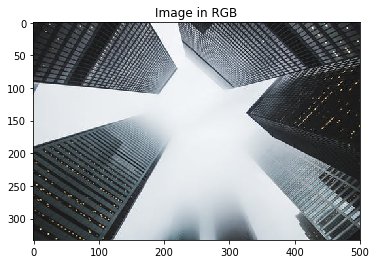

In [2]:
img = Image.open('building.jpeg')
plt.imshow(img)
plt.title('Image in RGB')
plt.show()

<h2>Converting from RGB image to Grayscale image</h2>
<p>Again, using Pillow library, we convert the RGB image to a grayscale image and display it using Matplotlib.</p>

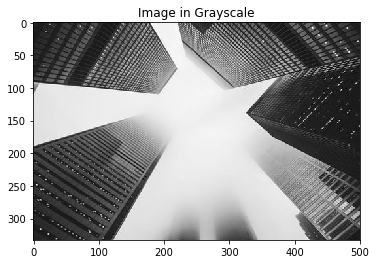

In [3]:
gray_image = img.convert('L')
plt.imshow(gray_image)
plt.title('Image in Grayscale')
plt.show()

<h2>Dimensions of the image</h2>
<p>In order to effectively detect edges in the image, it is required to have uniform dimensions. This helps in the convolution operations. For this tutorial, the image will be resized to 400 x 400 dimensions.</p>

In [4]:
width, height = gray_image.size
print("Width : {}, Height : {}".format(width, height))

reqd_width, reqd_height = 400, 400
print("Required Width : {}, Required Height : {}".format(reqd_width, reqd_height))

Width : 500, Height : 333
Required Width : 400, Required Height : 400


<h2>Resizing the image</h2>
<p>Using the resize( ) function of Pillow Image, we change the dimensions of the image to 400 x 400. Just for clarity, the image is again displayed using Matplotlib.</p>

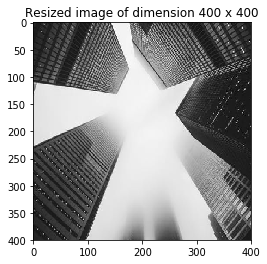

In [5]:
gray_image = gray_image.resize((reqd_width, reqd_height))
plt.imshow(gray_image)
plt.title('Resized image of dimension {} x {}'.format(gray_image.size[0], gray_image.size[1]))
plt.show()

<h2>Converting image to a NumPy matrix</h2>
<p>An image in computer is represented as a matrix of values. To obtain this matrix, we use NumPy library functionality to do the job for us in just a single line of code.</p>

In [6]:
cv_image = np.asarray(gray_image.getdata(), dtype=np.float64)
print(cv_image.shape)

(160000,)


<h2>Filters</h2>
<p>To actually detect any edges, computer vision scientists tried a variety of filters that actually could perform this task effectively. Eventually, they came up with hard-coded filter values, that when convolved with image, edges would be highlighted in the image. The filters we have used are :-</p>
<ul>
    <li>Sobel Filter</li>
    <li>Scharr Filter</li>
</ul>
<p>However, in the era of deep learning, we don't need to hand craft these numbers. We can treat them as weights and then learn them. It can learn horizontal, vertical, angled, or any edge type automatically rather than getting them by hand.</p>

In [7]:
sobel_filter = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
scharr_filter = np.array([[3, 0, -3], [10, 0, -10], [3, 0, -3]])
print(sobel_filter)
print(scharr_filter)
print("Dimensions of Sobel filter : ", sobel_filter.shape)
print("Dimensions of Scharr filter : ", scharr_filter.shape)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
[[  3   0  -3]
 [ 10   0 -10]
 [  3   0  -3]]
Dimensions of Sobel filter :  (3, 3)
Dimensions of Scharr filter :  (3, 3)


<h2>Convolution over Sobel Filter</h2>
<p>We have performed the convolution operation of the image and Sobel filter with the help of NumPy library's convolve( ) function (providing padding). Both the vertical as well as horizontal edges are highlighted as plotted with the help of Matplotlib.</p>

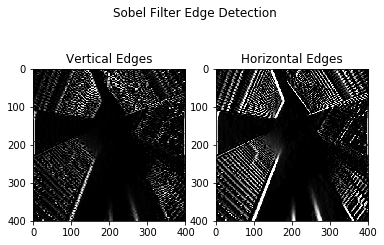

In [8]:
vertical_edges = np.convolve(cv_image, sobel_filter.flatten(), mode='same').reshape(reqd_width, reqd_height)
horizontal_edges = np.convolve(cv_image, sobel_filter.T.flatten(), mode='same').reshape(reqd_width, reqd_height)

v_edge_img = Image.fromarray(vertical_edges)
h_edge_img = Image.fromarray(horizontal_edges)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Sobel Filter Edge Detection')
ax1.imshow(v_edge_img)
ax1.title.set_text('Vertical Edges')
ax2.imshow(h_edge_img)
ax2.title.set_text('Horizontal Edges')
plt.show()

<h2>Convolution over Scharr Filter</h2>
<p>We have performed the convolution operation of the image and Sobel filter with the help of NumPy library's convolve( ) function (providing padding). Both the vertical as well as horizontal edges are highlighted as plotted with the help of Matplotlib.</p>

(400, 400)
(400, 400)


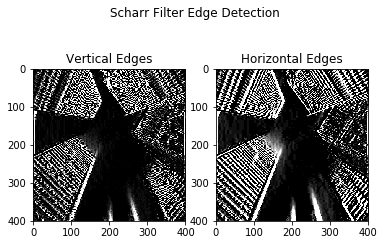

In [9]:
vertical_edges = np.convolve(cv_image, scharr_filter.flatten(), mode='same').reshape(reqd_width, reqd_height)
horizontal_edges = np.convolve(cv_image, scharr_filter.T.flatten(), mode='same').reshape(reqd_width, reqd_height)
print(vertical_edges.shape)
print(horizontal_edges.shape)

v_edge_img = Image.fromarray(vertical_edges)
h_edge_img = Image.fromarray(horizontal_edges)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Scharr Filter Edge Detection')
ax1.imshow(v_edge_img)
ax1.title.set_text('Vertical Edges')
ax2.imshow(h_edge_img)
ax2.title.set_text('Horizontal Edges')
plt.show()